In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("PPMI_Original_Cohort_BL_to_Year_5_Dataset_Apr2020.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445 entries, 0 to 3444
Columns: 159 entries, SITE to cogstate
dtypes: float64(131), int64(16), object(12)
memory usage: 4.2+ MB


In [3]:
df.rename(columns={"APPRDX":"Group"}, inplace=True) 
df.describe()

,SITE,PATNO,Group,YEAR,ST_year1,ST_year2,ST_year3,ST_year4,ST_year5,changedx,...,ptau_asyn,hemo,hemo_below,hemo_above,hemohi,urate,APOE_e4,LEDD,MCI_testscores,cogstate
count,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,2650.000000,...,1854.000000,590.000000,1227.0,204.0,2021.000000,3308.000000,3127.000000,1534.000000,3425.000000,2643.000000
mean,25.955007,3542.622932,1.408128,2.280406,0.404354,0.563135,0.617417,0.635704,0.638607,0.021132,...,0.010172,196.894237,1.0,1.0,0.189015,317.154172,0.286856,496.566674,0.144234,1.152857
std,13.686850,329.938490,0.590324,1.697262,0.490838,0.496070,0.486088,0.481302,0.480474,0.143852,...,0.002947,234.591695,0.0,0.0,0.391618,78.524851,0.502613,477.731417,0.351378,0.395013
min,10.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003269,20.000000,1.0,1.0,0.000000,89.000000,0.000000,15.000000,0.000000,1.000000
25%,17.000000,3262.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008627,45.400000,1.0,1.0,0.000000,262.000000,0.000000,257.000000,0.000000,1.000000
50%,21.000000,3515.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.009676,97.800000,1.0,1.0,0.000000,309.000000,0.000000,400.000000,0.000000,1.000000
75%,28.000000,3815.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.011043,252.525000,1.0,1.0,0.000000,369.000000,1.000000,604.500000,0.000000,1.000000
max,59.000000,4139.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.050818,1227.300000,1.0,1.0,1.000000,714.000000,2.000000,10300.000000,1.000000,3.000000


In [4]:
df["Group"].value_counts()

1    2223
2    1038
3     184
Name: Group, dtype: int64

In [5]:
patient = df[df["Group"]== 1]
control = df[df["Group"]==2]
swedd = df[df["Group"]==3]
prodormal  = df[df["Group"]==4]

In [6]:
patient.isnull().sum()

SITE                0
PATNO               0
Group               0
EVENT_ID            0
YEAR                0
                 ... 
APOE_e4           211
MAPT              182
LEDD              708
MCI_testscores     17
cogstate          462
Length: 159, dtype: int64

In [7]:
null_patient = pd.DataFrame(patient.isnull().sum())
null_pat = pd.DataFrame(null_patient[null_patient[0]>450][0].sort_values(ascending=False))
null_pat

,0
othneuro,2223
abeta_txt,2222
tau_txt,2198
ptau_txt,2103
hemo_above,2095
symptom5_comment,1857
hemo,1854
upsit_cat,1800
upsit,1800
hemo_below,1439


In [8]:
null_cont = pd.DataFrame(control.isnull().sum())
null_cont = pd.DataFrame(null_cont[null_cont[0]>450][0].sort_values(ascending=False))
null_cont

,0
abeta_txt,1038
duration,1038
ageonset,1038
agediag,1038
DOMSIDE,1038
symptom1,1038
symptom2,1038
symptom3,1038
symptom4,1038
symptom5,1038


In [20]:
patient.drop(null_pat.index.tolist(), axis=1, inplace=True)
pd.DataFrame(patient.isnull().sum())[0].sort_values(ascending=False)

/var/folders/j5/r9qb4hl97c73h2631hlsttvw0000gn/T/ipykernel_16373/3238164239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient.drop(null_pat.index.tolist(), axis=1, inplace=True)


updrs_totscore    436
td_pigd           432
td_pigd_old       432
changedx          431
updrs3_score      431
                 ... 
symptom4            0
symptom5            0
symptom6            0
PATNO               0
SITE                0
Name: 0, Length: 107, dtype: int64

In [21]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 6 to 3441
Columns: 107 entries, SITE to MCI_testscores
dtypes: float64(84), int64(16), object(7)
memory usage: 1.8+ MB


/var/folders/j5/r9qb4hl97c73h2631hlsttvw0000gn/T/ipykernel_16373/625479781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(patient.corr())


<AxesSubplot: >

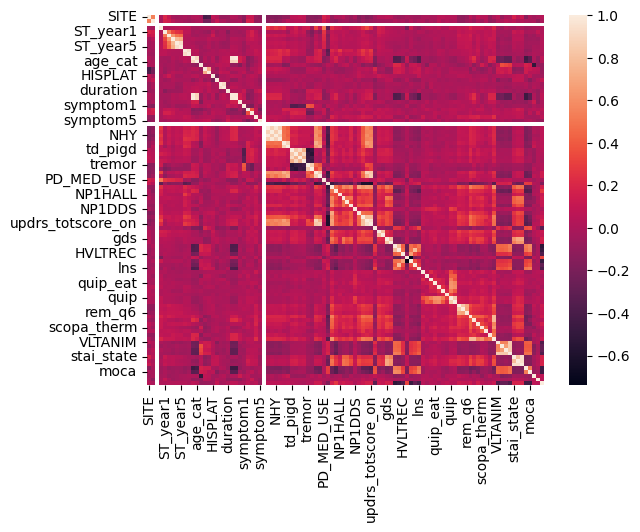

In [22]:
sns.heatmap(patient.corr())